# HW9: Finite Elements (Rayleigh-Ritz) and Stability

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
init_printing()
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.labelsize']=28
plt.rcParams['xtick.labelsize']=28
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.major.size']=8
plt.rcParams['xtick.minor.size']=4
plt.rcParams['ytick.major.size']=8
plt.rcParams['ytick.minor.size']=4
plt.rcParams['lines.markersize']=np.sqrt(36)

## Initialize the degrees of freedom

In [2]:
alph = zeros(6,1)
for i in range(len(alph)):
    alph[i] = Symbol('alpha_{}'.format(i+1),real=True)

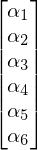

In [3]:
alph

In [4]:
x = Symbol('x',real=True)
y = Symbol('y',real=True)

a1 = Symbol('a_1',real=True)
a2 = Symbol('a_2',real=True)
a3 = Symbol('a_3',real=True)

l = Symbol('l',real=True)
w = Symbol('w',real=True)
h = Symbol('h',real=True)

N1_1 = a1 + a2*x + a3 *y #shape function for node 1 subscript (elem: no.)
N3_1 = a1 + a2*x + a3 *y
N1_2 = a1 + a2*x + a3 *y
N1_3 = a1 + a2*x + a3 *y
N3_3 = a1 + a2*x + a3 *y

## Determine the shape functions

In [5]:
# Triangle 1
sys1_1 = solve_linear_system(Matrix([[1,0,l,1], [1,0,0,0], [1,1/2*w,l,0]]),a1,a2,a3)
sys2_1 = solve_linear_system(Matrix([[1,0,l,0], [1,0,0,0], [1,1/2*w,l,1]]),a1,a2,a3)

# Triangle 2
sys1_2 = solve_linear_system(Matrix([[1,1/2*w,l,1], [1,0,0,0], [1,w,0,0]]),a1,a2,a3)

# Triangle 3
sys1_3 = solve_linear_system(Matrix([[1,1/2*w,l,1], [1,w,0,0], [1,w,l,0]]),a1,a2,a3)
sys2_3 = solve_linear_system(Matrix([[1,1/2*w,l,0], [1,w,0,0], [1,w,l,1]]),a1,a2,a3)


In [6]:
# Triangle 1
N1_1 = N1_1.subs(sys1_1)
N3_1 = N3_1.subs(sys2_1)

# Triangle 2
N1_2 = N1_2.subs(sys1_2)

# Triangle 3
N1_3 = N1_3.subs(sys1_3)
N3_3 = N3_3.subs(sys2_3)

### Look for the displacement field $u$ and $v$

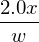

In [7]:
N3_1

In [8]:
# Triangle 1
u1_1 = N1_1*alph[0] + N3_1*alph[2]
v1_1 = N1_1*alph[1] + N3_1*alph[3]

# Triangle 2
u1_2 = N1_2*alph[2]
v1_2 = N1_2*alph[3]

# Triangle 3
u1_3 = N1_3*alph[2] + N3_3*alph[-2]
v1_3 = N1_3 * alph[3] + N3_3*alph[-1]

In [9]:
eps_1 = Matrix([[u1_1.diff(x),0.5*(u1_1.diff(y) + v1_1.diff(x)) ], [0.5*(u1_1.diff(y) + v1_1.diff(x)), v1_1.diff(y)]])
eps_2 = Matrix([[u1_2.diff(x),0.5*(u1_2.diff(y) + v1_2.diff(x)) ], [0.5*(u1_2.diff(y) + v1_2.diff(x)), v1_2.diff(y)]])
eps_3 = Matrix([[u1_3.diff(x),0.5*(u1_3.diff(y) + v1_3.diff(x)) ], [0.5*(u1_3.diff(y) + v1_3.diff(x)), v1_3.diff(y)]])

### Material properties


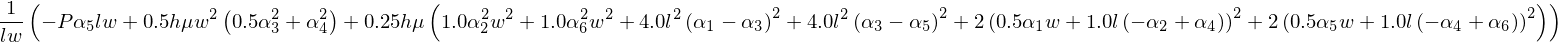

In [10]:
# mu = 1.e7
# nu = 0.
# lmbda = 0.
mu=Symbol('mu',real=True)
lmbda = Symbol('lambda',real=True)
# P = 10.
P = Symbol('P',real=True)
# l = w = 1
# h = 0.01

# A_i are the elemental volumes
A3 = A1 = 1/4*w*l*h
A2 = 2*A3
# Defining the potential energy
U = mu*trace(eps_1*eps_1)*A1 + mu*trace(eps_3*eps_3)*A3 + mu*trace(eps_2*eps_2)*A2 - P*alph[4]
simplify(U)

In [11]:
eqns = []
for i in range(len(alph)):
    eqns.append(U.diff(alph[i]))

In [12]:
soln = solve(eqns,alph)

In [13]:
alph = alph.subs(soln)

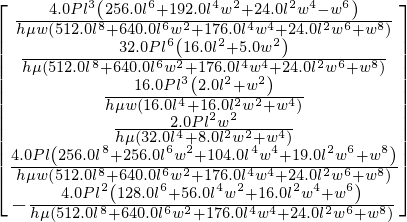

In [14]:
alph

In [15]:
subs_list = [(l,1), (w,1), (h,0.01),(P,10.),(mu,1.e7/2)]

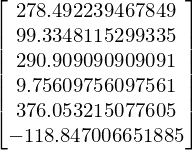

In [16]:
alph = alph.subs(subs_list)
alph * 10**6

In [17]:
import matplotlib.tri as tri

In [18]:
u = np.array([alph],float).flatten()
u_def = u * 1.e3

In [19]:
xnodes = np.array([0., 1., 1., 0.5, 0.])
ynodes = np.array([0., 0., 1., 1, 1])
conn = [[0,3,4], [0,1,3], [1,2,3]]
triangles = tri.Triangulation(xnodes, ynodes, triangles = conn)

In [20]:
xnodes_def = np.array([0.,1.,1+u_def[-2],0.5+u_def[-4],u_def[0]])
ynodes_def = np.array([0.,0.,1+u_def[-1],1+u_def[-3],1+u_def[1]])
triangles_def = tri.Triangulation(xnodes_def, ynodes_def, triangles = conn)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


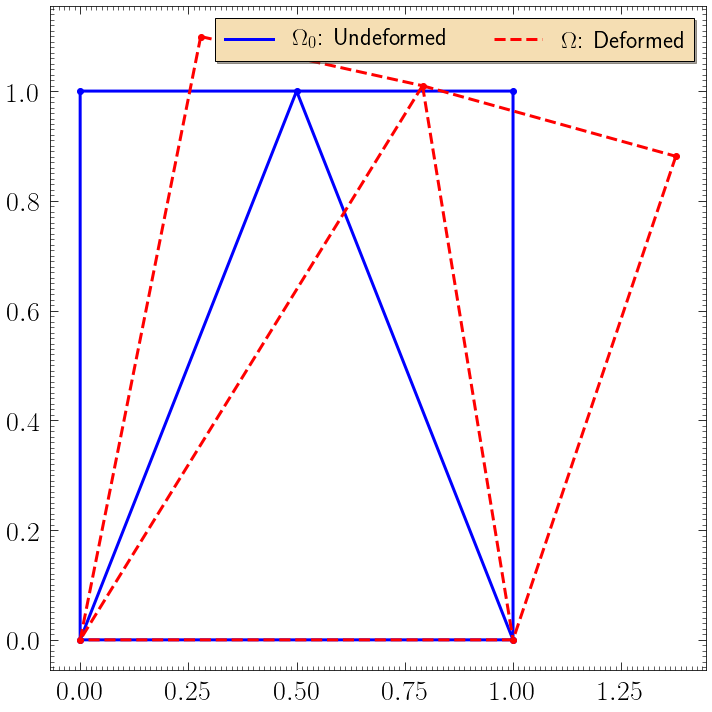

In [21]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.triplot(triangles,'-bo',lw=3,label=r'$\Omega_0$: Undeformed')
ax.triplot(triangles_def,'--ro',lw=3,label=r'$\Omega$: Deformed')
ax.tick_params(pad=10)
# ax.grid(which='major')
ax.xaxis.set_minor_locator(AutoMinorLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(20))
h,l = ax.get_legend_handles_labels()
ax.legend(loc=0,handles = [h[0],h[2]],labels = [l[0],l[2]],fontsize=24,ncol=4,fancybox=False,facecolor='wheat',edgecolor='k',shadow=True)
fig.tight_layout()
fig.savefig(r'plotP1.eps')

In [22]:
eps_1 = eps_1.subs(subs_list)

In [23]:
alph = [i for i in alph]

In [24]:
alph

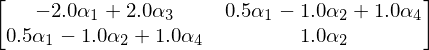

In [25]:
eps_1

In [26]:
2*(alph[2]-alph[0])*10**6

In [27]:
simplify(U.subs(subs_list)/10**3)